## ASTR 404/514 2020W model fitting Notebook

General Python information can be found at http://scipy-lectures.github.io <br>
Astropy documentation is at http://www.astropy.org  

You should install the Anaconda distribution from https://www.anaconda.com/download <br>
The current Python version distributed with Anaconda is 3.8.3.

Some helpful packages to load:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

### Define the independent variable and model parameters

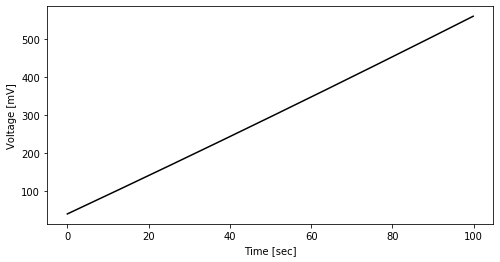

In [2]:
# Independent variable is time
npts = 1000
dt = 0.1
time = dt*np.arange(npts)
a_in = 40.  ;  b_in = 5.0  ;  c_in = 0.002
signal = a_in + b_in*time + c_in*time**2

fig = plt.figure(figsize=(8,4))
plt.plot(time,signal,color='k')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [mV]')
plt.show()

### Generate a mock data set with noise

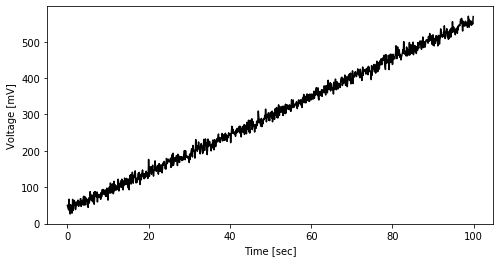

In [3]:
# Define the input function to be transformed
sigma = 10.
noise = np.random.normal(0.,sigma,npts)
data = signal + noise

fig = plt.figure(figsize=(8,4))
plt.plot(time,data,color='k')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [mV]')
plt.show()

In [6]:
noise

array([ 10.0581,   5.717 ,   0.4844,  -2.6535,  25.0374,  -6.9602,
         1.2627, -16.9386,   8.1498,  -5.9091, -15.2334, -12.798 ,
       -16.874 ,  20.0847, -10.78  ,  -6.254 ,   6.2244,  15.0153,
        11.2463,   5.391 , -11.5649,  -5.9762,   8.0064,   3.8333,
        -0.73  ,   6.8577,  11.4124,  -5.0817,  -6.6854,  -3.5517,
         5.3657,   1.2871,  12.0474,  11.9737,  -9.8703,   2.6949,
        -0.4812,   5.0132,  -7.3537,   7.8412,  14.8628,  -9.9329,
        13.3582,  12.5709,   4.6104, -11.306 ,   6.945 ,   5.8409,
        -3.0083,  -3.6403,   0.8084, -20.9435,  -4.419 ,   4.0674,
       -10.5401,   6.1346,  19.8179,  11.0815,  -2.6184,  -5.72  ,
         8.1247,   4.835 , -11.0804,   6.2195,  -5.5625,  12.8625,
       -19.8158,  -2.492 ,  13.9228,   0.24  ,  10.1922,   4.1119,
        -3.0843,  10.3111, -17.6343,   3.4577,  -5.6491,  -0.9116,
        -7.3296,  -7.6827,  -1.5022,  -0.0954, -14.2886,   3.4618,
        -9.1802,  -5.6607,  10.1125,  -3.393 ,   9.5808,   5.5

### Compute the system of equations - linear fit

Best fit a, b: [35.2714  5.2183]


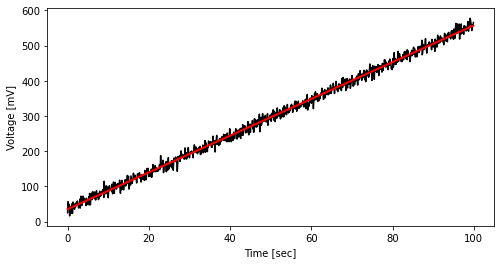

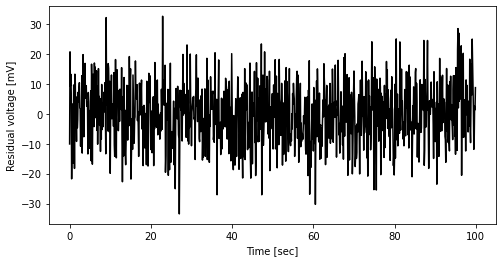

Best fit a, b: [35.2714  5.2183]
Parameter covariance: [[ 0.3994 -0.006 ]
 [-0.006   0.0001]]
Parameter uncertainties: [0.632 0.011]
chi^2 of the fit: 1001.5966314394211
Expected chi^2 mean, std.: 998 44.67661580737735


In [60]:
# Define the basis functions
f_a = 0.*time + 1.
f_b = time

# Evaluate the elements of M
M = np.zeros([2,2])
M[0,0] = np.sum((f_a/sigma)*(f_a/sigma))
M[0,1] = np.sum((f_a/sigma)*(f_b/sigma))
M[1,0] = M[0,1]
M[1,1] = np.sum((f_b/sigma)*(f_b/sigma))
#print(M)

# Evaluate the elements of v
v = np.zeros([2])
v[0] = np.sum((data/sigma)*(f_a/sigma))
v[1] = np.sum((data/sigma)*(f_b/sigma))
#print(v)

# Solve for the model parameters a, b
M_inv = np.linalg.inv(M)
param = np.dot(M_inv,v)
print('Best fit a, b:', param)

# Construct the best-fit model
model = param[0]*f_a + param[1]*f_b

# Plot the best-fit model
fig = plt.figure(figsize=(8,4))
plt.plot(time,data,color='k')
plt.plot(time,model,color='r',linewidth=2)
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [mV]')

fig = plt.figure(figsize=(8,4))
plt.plot(time,data-model,color='k')
plt.xlabel('Time [sec]')
plt.ylabel('Residual voltage [mV]')
plt.show()

print('Best fit a, b:', param)
print('Parameter covariance:', M_inv)
print('Parameter uncertainties:', np.sqrt(np.diag(M_inv)))
print('chi^2 of the fit:',np.sum(((data-model)/sigma)**2))
print('Expected chi^2 mean, std.:', npts-2, np.sqrt(2*(npts-2)))

### Compute the system of equations - quadratic fit